In [11]:
import pandas as pd

music_data = pd.read_csv('music.csv')
music_data.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [12]:
X = music_data.drop(columns=['genre']) # X is used by convention
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [13]:
y = music_data['genre'] # y is used by convention
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [14]:
from sklearn.tree import DecisionTreeClassifier # sklearn is the package that comes with scikit learn and tree is the module in that package and DecisionTreeClassifier is the class in it which implements the decision tree algorithm

In [15]:
model = DecisionTreeClassifier()
model.fit(X, y)
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [17]:
predictions = model.predict([[32, 1]])
predictions

C:\Users\rinip\anaconda3\envs\simpliLearn\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Classical'], dtype=object)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model.fit(X_train, y_train)
# predictions2 = model.predict(X_test)

# model = joblib.load('music-recommender.joblib')

# pred = model.predict([[32, 0]])
# pred

# score = accuracy_score(y_test, predictions2)
# score

tree.export_graphviz(model, out_file='music-rec.dot',
                    feature_names=['age', 'gender'],
                    class_names=sorted(y.unique()),
                    label='all',
                    rounded=True,
                    filled=True)

[Text(0.625, 0.875, 'age <= 30.5\ngini = 0.755\nsamples = 14\nvalue = [3, 5, 1, 3, 2]\nclass = Classical'),
 Text(0.5, 0.625, 'gender <= 0.5\ngini = 0.716\nsamples = 9\nvalue = [3, 0, 1, 3, 2]\nclass = Acoustic'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'age <= 23.0\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 1, 0, 0]\nclass = Acoustic'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]\nclass = Dance'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]\nclass = Acoustic'),
 Text(0.75, 0.375, 'age <= 25.5\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 0, 3, 2]\nclass = HipHop'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0]\nclass = HipHop'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2]\nclass = Jazz'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0, 0, 0]\nclass = Classical'),
 Text(0.6875, 0.75, '  False')]

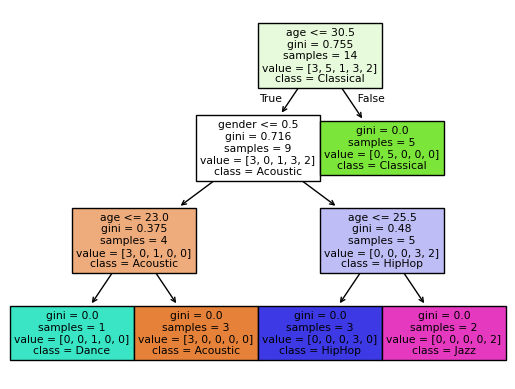

In [55]:
tree.plot_tree(model, feature_names = ['age', 'gender'],
                    class_names = sorted(y.unique()),
                     filled = True)